In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Task 1. (20 점) csv 파일을 다운로드 받고 pandas를 이용하여 불러오기")
data = pd.read_csv('/content/p01_input.csv', index_col = 0, encoding='CP949')


data_sample = data.loc[:,['키', '몸무게']]

data_sample = data_sample.dropna(axis=0).reset_index(drop=True)

data_sample


Task 1. (20 점) csv 파일을 다운로드 받고 pandas를 이용하여 불러오기


,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5
...,...,...
9677,176.1,50.4
9678,174.1,88.8
9679,169.5,63.2
9680,159.2,52.9


In [293]:
print("Task 2. (10 점) 학생들의 평균 키와 평균 몸무게 구하기")
mean_weight = data_sample['몸무게'].mean()
mean_height = data_sample['키'].mean()

print("평균 몸무게 : ", mean_weight)
print("평균 키     : ", mean_height)

Task 2. (10 점) 학생들의 평균 키와 평균 몸무게 구하기
평균 몸무게 :  50.20759140673406
평균 키     :  154.56483164635458


In [294]:
from pandas import DataFrame
import sys

print("Task 3. (10 점) 키와 몸무게 사이의 상관관계 (Pearson Correlation Coefficient) 구하기")

X = data_sample.키
Y = data_sample.몸무게

mean_x = sum(X)/len(X)
mean_y = sum(Y)/len(Y)

std_x = (sum((x - mean_x) ** 2 for x in X)/len(X)) ** 0.5
std_y = (sum((y - mean_y) ** 2 for y in Y)/len(Y)) ** 0.5


cov = sum((x - mean_x) * (y - mean_y) for x, y in zip(X,Y))/len(X)
corr = cov/std_x/std_y

print("상관관계 : ", corr)

Task 3. (10 점) 키와 몸무게 사이의 상관관계 (Pearson Correlation Coefficient) 구하기
상관관계 :  0.8490058387689013


In [295]:
print("Task 4.   (40 점) Linear Regression을 사용하여 키와 몸무게 사이의 선형관계를 찾기 (= 직선의 방정식 구하기: y= wx + b 에서 w와 b값 구하기)")
print("Task 4-1. (10 점) 가설, 비용 설정하기")
print("Task 4-2. (20 점) 경사하강법으로 비용을 최소로 만들도록 학습하기 (torch.optim 사용하지 말고 직접 구현해보기)")

import torch

X = data_sample.loc[:,['키']]
Y = data_sample.loc[:,['몸무게']]

X = np.array(X).reshape(len(X), 1)
Y = np.array(Y).reshape(len(Y), 1)

x_train = torch.FloatTensor(X)
y_train = torch.FloatTensor(Y)

W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr1 = 0.000037
lr2 = 0.1

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.mm(x_train, W) + b
  cost = torch.mean((hypothesis - y_train) ** 2)
  
  cost.backward()
  
  with torch.no_grad():
    W = W - lr1 * W.grad
    b = b - lr2 * b.grad

  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}' .format(epoch,cost.item(), W.squeeze(), b))    

Task 4.   (40 점) Linear Regression을 사용하여 키와 몸무게 사이의 선형관계를 찾기 (= 직선의 방정식 구하기: y= wx + b 에서 w와 b값 구하기)
Task 4-1. (10 점) 가설, 비용 설정하기
Task 4-2. (20 점) 경사하강법으로 비용을 최소로 만들도록 학습하기 (torch.optim 사용하지 말고 직접 구현해보기)
epoch: 0, cost: 2812.360352, W: 0.592469334602356, b: tensor([[10.0415]])
epoch: 100, cost: 334.758942, W: 0.48585575819015503, b: tensor([[-10.4313]])
epoch: 200, cost: 133.929337, W: 0.5143603682518005, b: tensor([[-24.9668]])
epoch: 300, cost: 107.303085, W: 0.5684497952461243, b: tensor([[-36.1554]])
epoch: 400, cost: 97.648003, W: 0.6205297708511353, b: tensor([[-45.0358]])
epoch: 500, cost: 91.929871, W: 0.6648380160331726, b: tensor([[-52.1604]])
epoch: 600, cost: 88.249962, W: 0.7012065649032593, b: tensor([[-57.8974]])
epoch: 700, cost: 85.857956, W: 0.7307154536247253, b: tensor([[-62.5228]])
epoch: 800, cost: 84.301376, W: 0.7545678019523621, b: tensor([[-66.2536]])
epoch: 900, cost: 83.288300, W: 0.773823082447052, b: tensor([[-69.2631]])
epoch: 1000, cost: 82.628922, W: 0.

Task 5. (20 점) Matplotlib을 사용하여 좌표평면상에 입력값(키, 몸무게)과 구한 직선을 그려보기
Task 5-1. (10 점) 입력값(키, 몸무게)를 산포도로 그리기 (x축=키, y축=몸무게)
Task 5-2. (10 점) w와 b값을 이용하여 직선 그리기 (산포도와 일치하는지 확인하여 학습이 잘 되었는지 확인하기 위함)


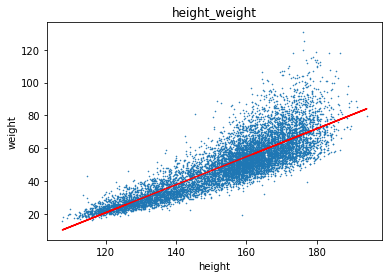

In [296]:
print("Task 5. (20 점) Matplotlib을 사용하여 좌표평면상에 입력값(키, 몸무게)과 구한 직선을 그려보기")
print("Task 5-1. (10 점) 입력값(키, 몸무게)를 산포도로 그리기 (x축=키, y축=몸무게)")
print("Task 5-2. (10 점) w와 b값을 이용하여 직선 그리기 (산포도와 일치하는지 확인하여 학습이 잘 되었는지 확인하기 위함)")

plt.scatter(X, Y, s=0.3)
plt.plot(X, W*X + b, c ='red')  # draw line
plt.xlabel("height")
plt.ylabel("weight")
plt.title("height_weight")
plt.show()

